# **Detección de Bordes de Dientes y Nervios**

## Realizado por Ismael Franco Hernando

Este notebook busca obtener los puntos del borde de una imagen que contiene un fondo blanco y una máscara de la imagen de un nervio o diente, y finalmente guardarlos en su correspondiente archivo JSON. Para ello se usará la librería CV2.

Además, en caso de estar ejecutándose en Google Colab, se pueden incluir todos los JSON en un ZIP para poder descargarlos de forma más cómoda.

## Imports

In [ ]:
import cv2
import os
import json
import shutil
import zipfile
import numpy as np
from google.colab.patches import cv2_imshow


## Función para obtener los puntos del borde de un diente o nervio

In [ ]:
# Método encargado de aplicar CV2 para obtener el borde de las imágenes.
#
# Parámetros:
#  - fotos: diccionario con las rutas de las imágenes a las que se desea obtener
#           los puntos del borde.
#  - dibujar: True en caso de que se quiera dibujar la imagen con el borde
#             obtenido.
#  - bordes: True en caso de que se quiera dibujar el borde de los puntos
#            unidos, False en caso de que solo se quieran dibujar los puntos.
# Return:
#  - diccionario: contiene el par imagen, conjuntos de puntos del borde.
def obtener_bordes(fotos, dibujar=False, bordes=True):
    area_min = 1000
    area_max = 200000
    # Diccionario formado por el nombre de la imagen como clave y en el valor
    # estaran los puntos de su controno
    diccionario = {}

    for f in fotos:
        ruta = f.split("/")
        # Cargamos la imagen
        foto = cv2.imread(f)
        # La pasamos a escalas de grises
        escala_grises = cv2.cvtColor(foto, cv2.COLOR_BGR2GRAY)
        # Obtenemos las partes deseadas (umbrales de color)
        reequilibrio, partes = cv2.threshold(escala_grises, 0, 255,
                                             cv2.THRESH_BINARY | cv2.THRESH_TRIANGLE)
        # Obtenemos los contornos
        contornos, jerarquia = cv2.findContours(partes, cv2.RETR_TREE,
                                                cv2.CHAIN_APPROX_SIMPLE)

        for c in contornos:
            area = cv2.contourArea(c)
            if area > area_min and area < area_max:
                diccionario[ruta[1]] = c
                if bordes:
                    cv2.drawContours(foto, [c], 0, (0, 0, 255), 2)
                else:
                    cv2.drawContours(foto, c, -1, (0, 0, 255), 2)

        if dibujar:
            print("Imagen", ruta[1])
            cv2_imshow(foto)

    return diccionario


## Dientes

In [ ]:
dientes = []
for fichero in os.listdir("dientes/"):
    if fichero.endswith('.png'):
        dientes.append("dientes/"+fichero)


Imagen Caso03_1.png


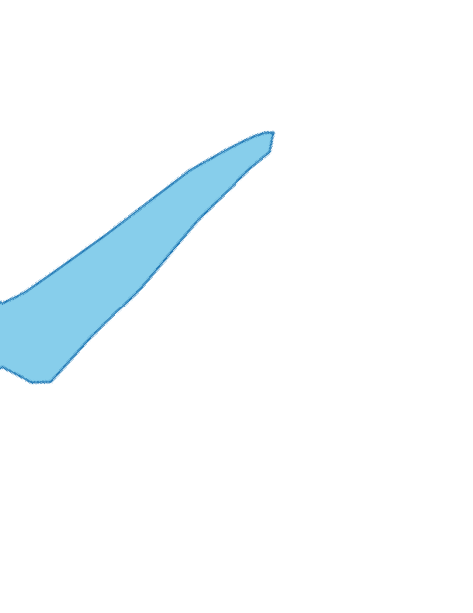

Imagen Caso07_0.png


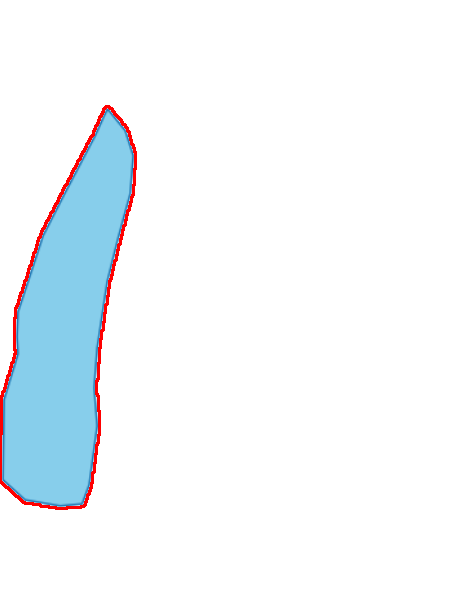

Imagen Caso06_2.png


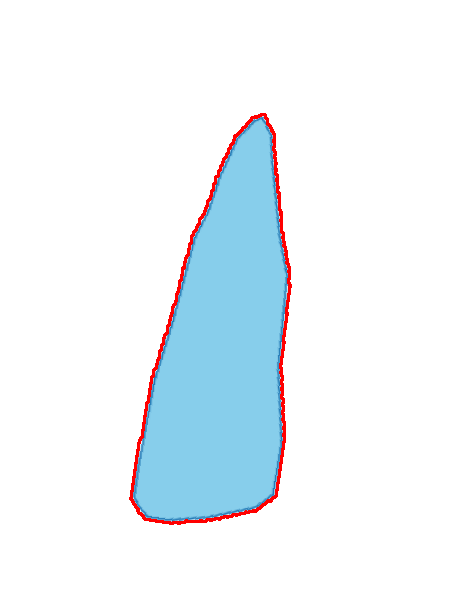

Imagen Caso05_2.png


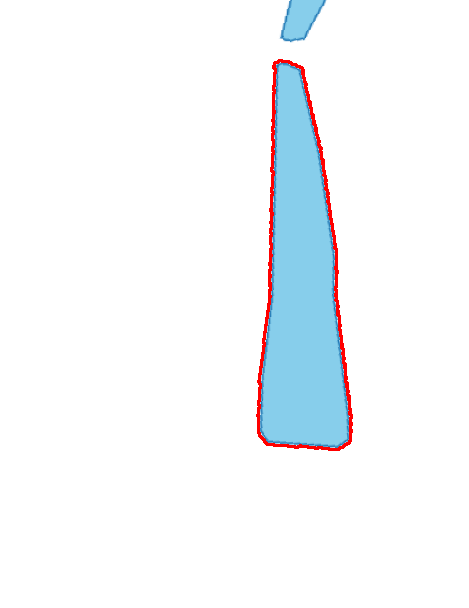

Imagen Caso09_1.png


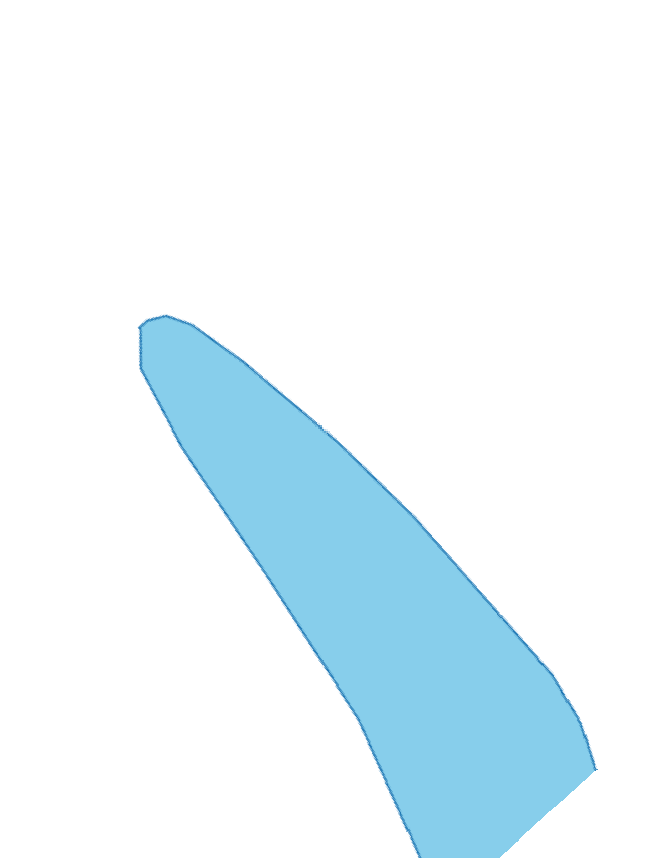

Imagen Caso06_1.png


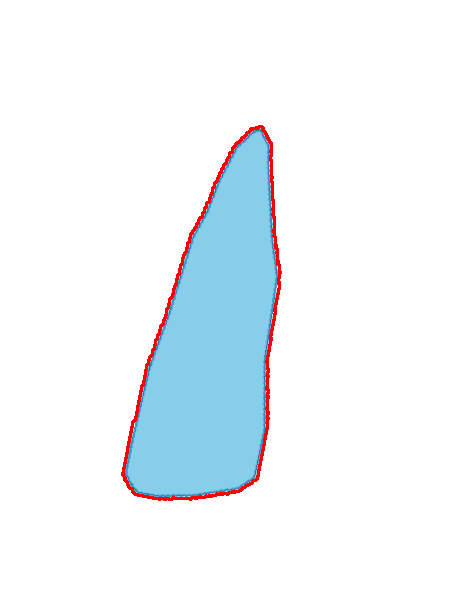

Imagen Caso02_2.png


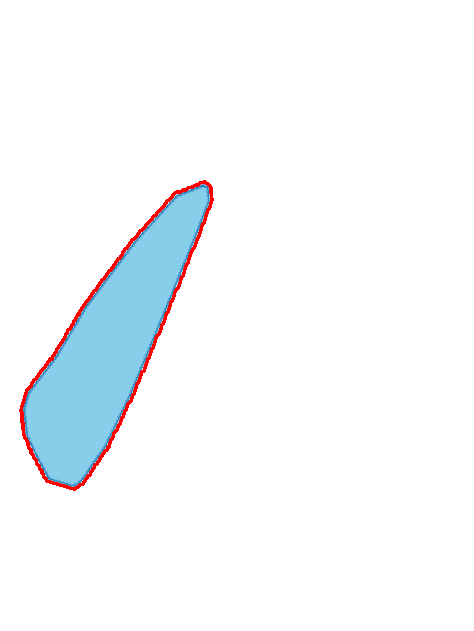

Imagen Caso10_0.png


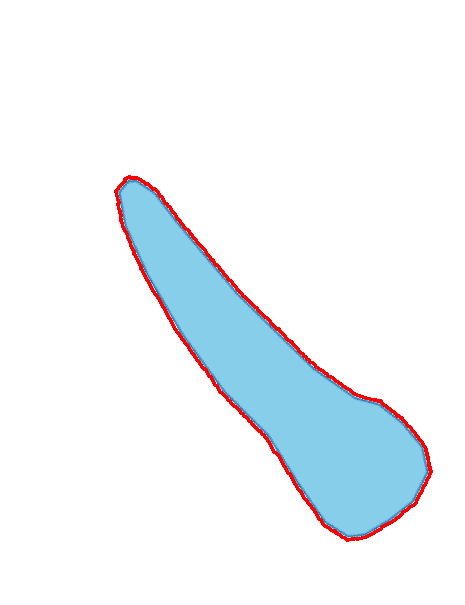

Imagen Caso03_0.png


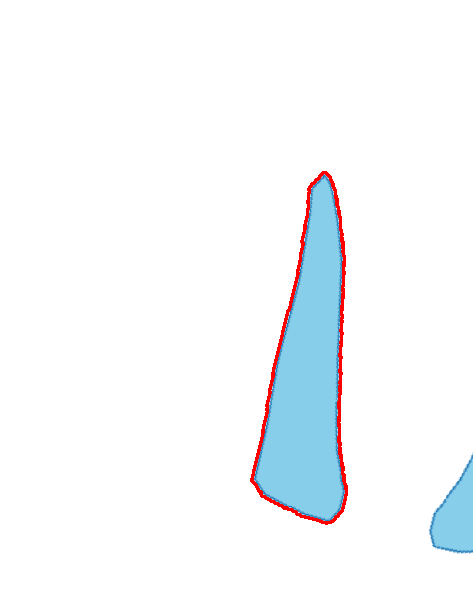

Imagen Caso04_0.png


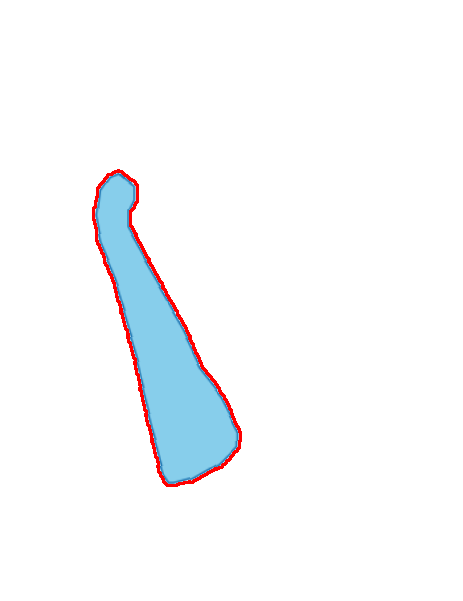

Imagen Caso04_2.png


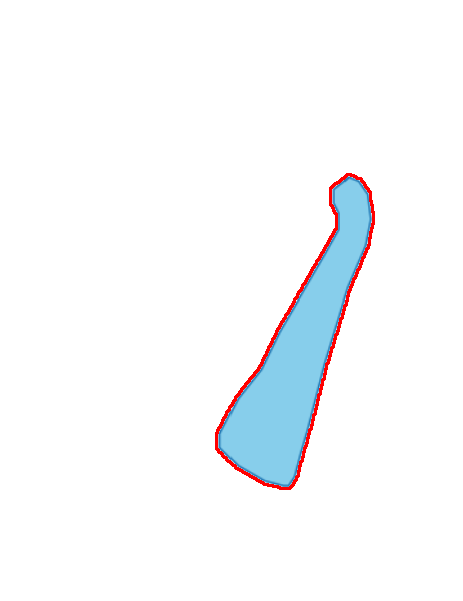

Imagen Caso10_1.png


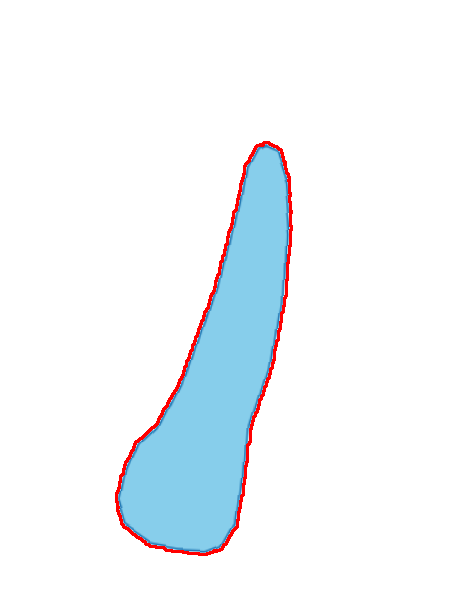

Imagen Caso07_2.png


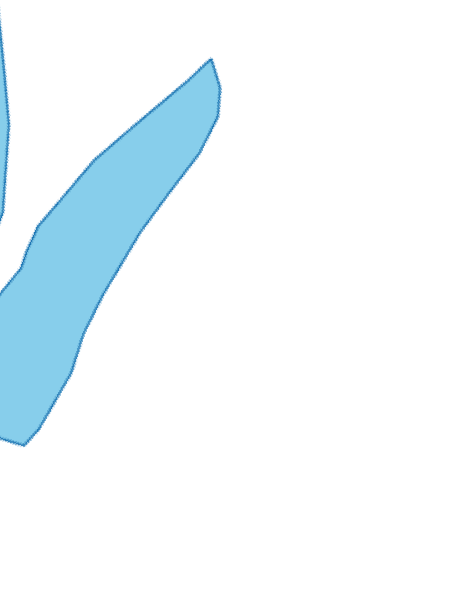

Imagen Caso08_1.png


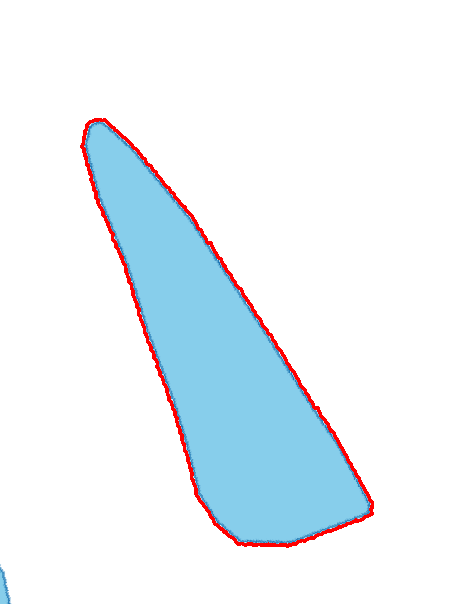

Imagen Caso05_0.png


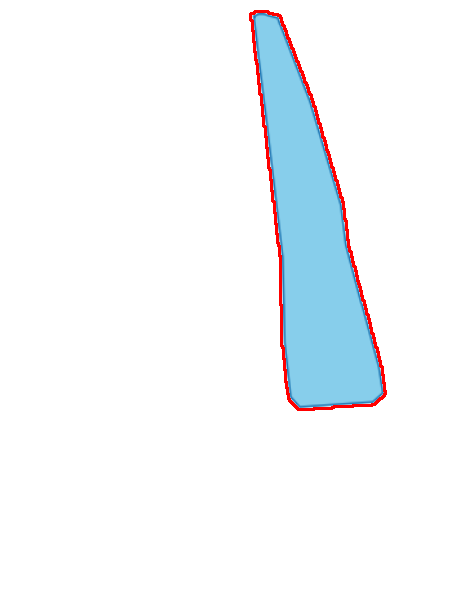

Imagen Caso04_1.png


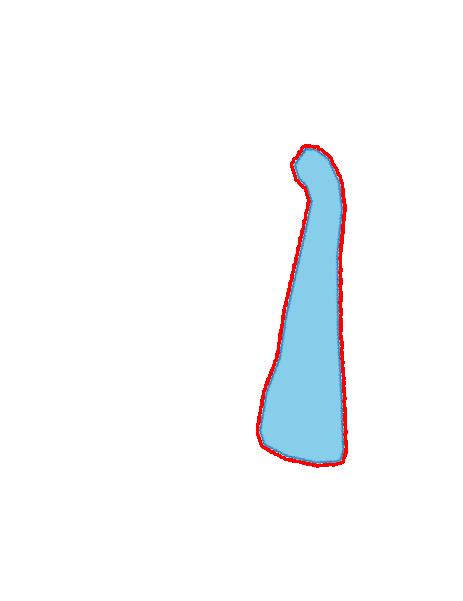

Imagen Caso02_1.png


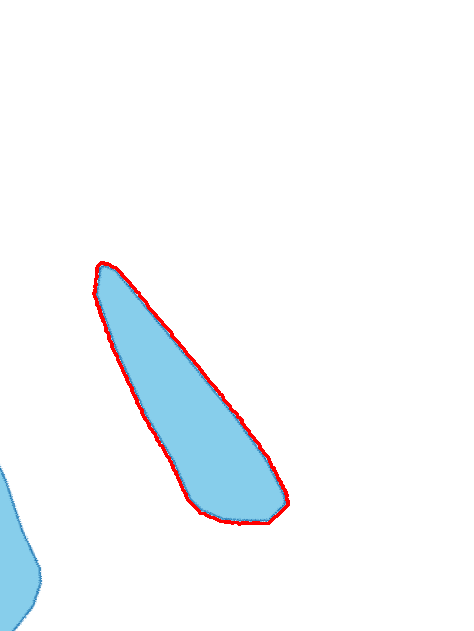

Imagen Caso01_0.png


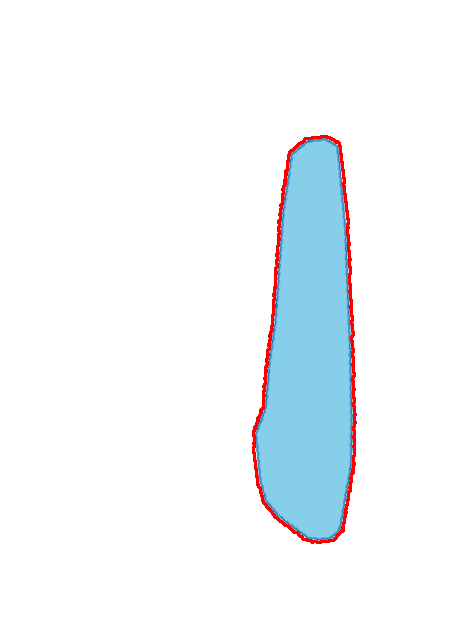

Imagen Caso03_2.png


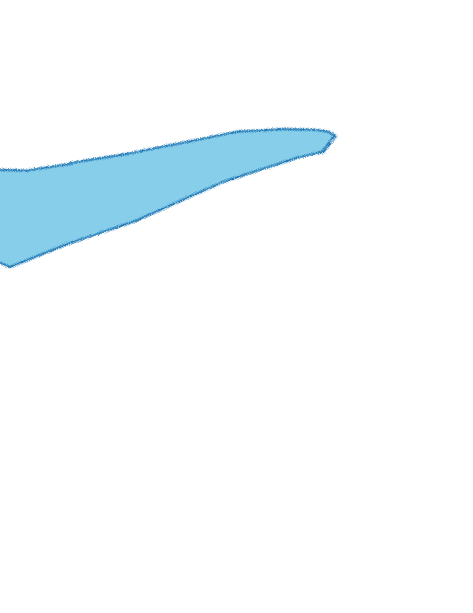

Imagen Caso02_0.png


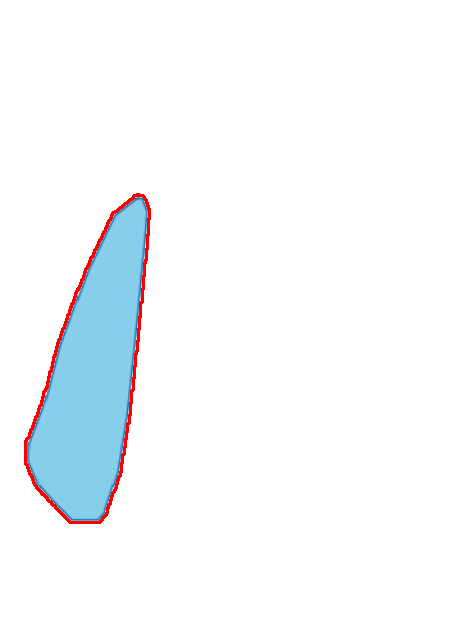

Imagen Caso06_0.png


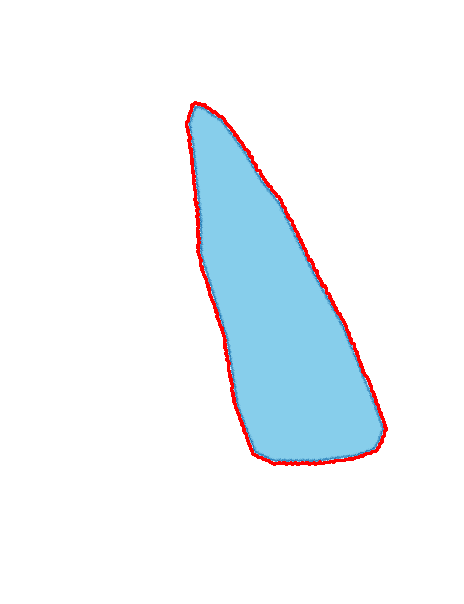

Imagen Caso10_2.png


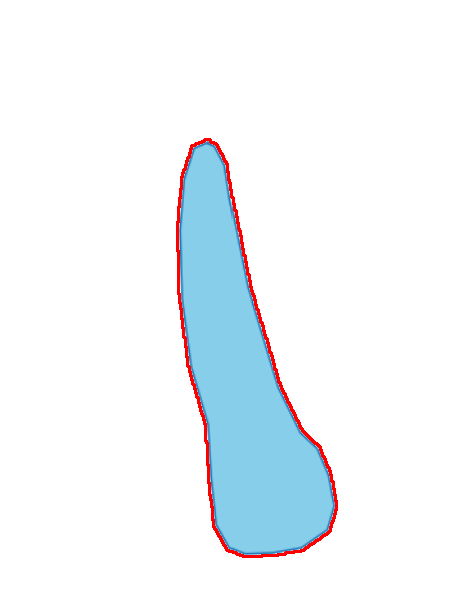

Imagen Caso01_1.png


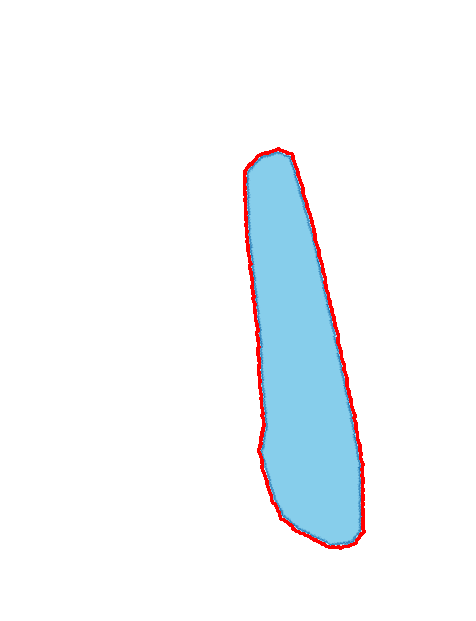

Imagen Caso08_2.png


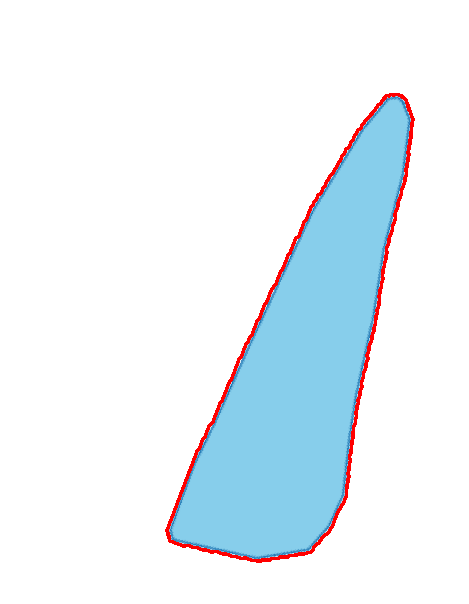

Imagen Caso08_0.png


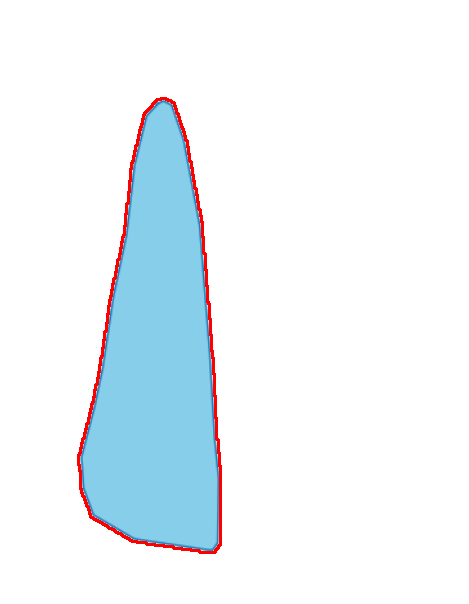

Imagen Caso01_2.png


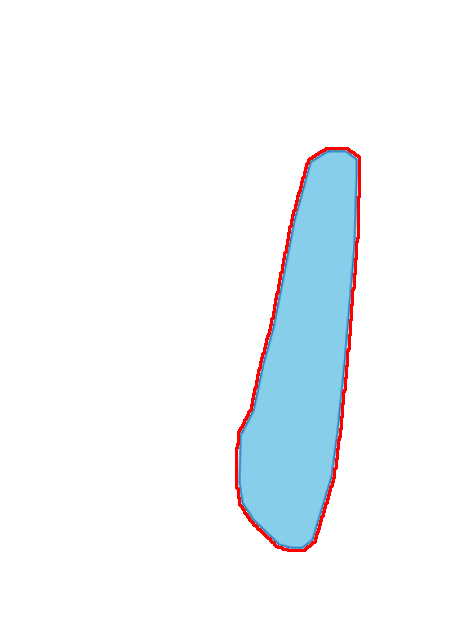

Imagen Caso07_1.png


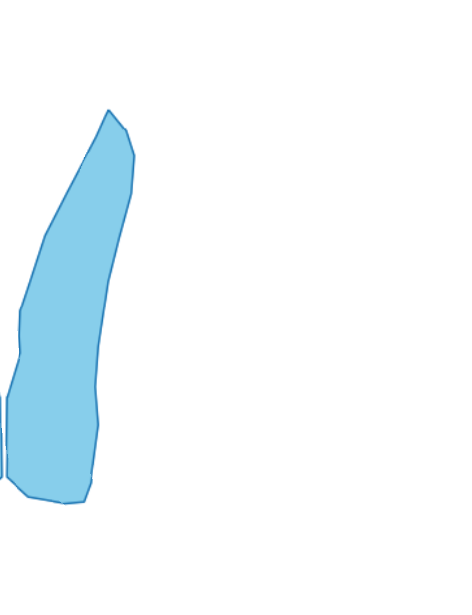

Imagen Caso05_1.png


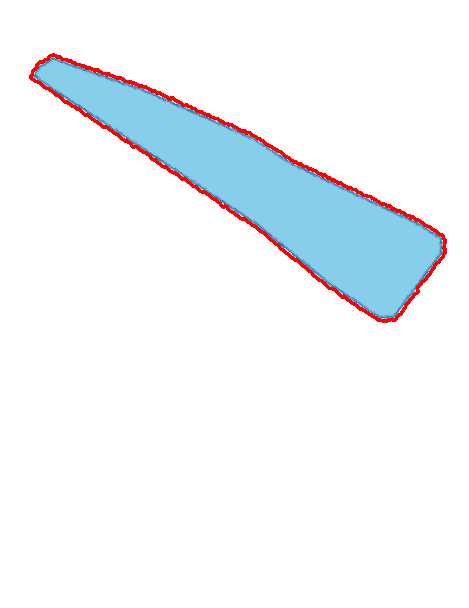

In [ ]:
diccionario_dientes = obtener_bordes(dientes, dibujar=True)


## Nervios

In [ ]:
nervios = []
for fichero in os.listdir("nervios/"):
    if fichero.endswith('.png'):
        nervios.append("nervios/"+fichero)


Imagen Caso03_1.png


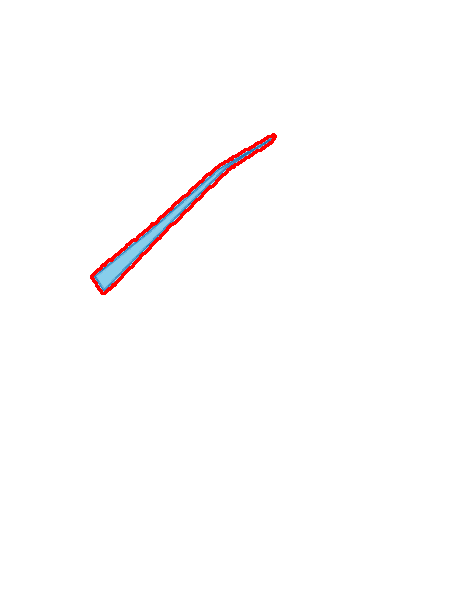

Imagen Caso07_0.png


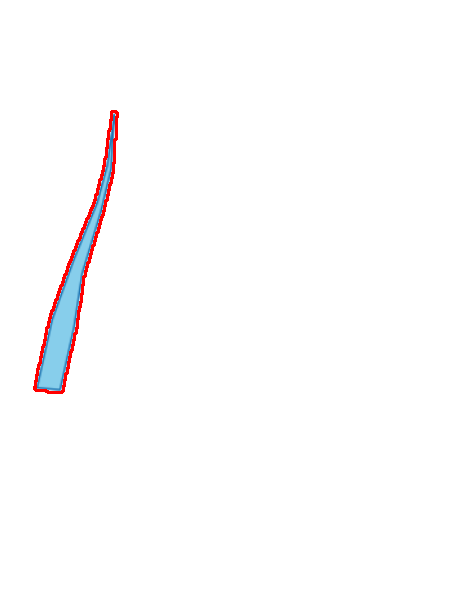

Imagen Caso06_2.png


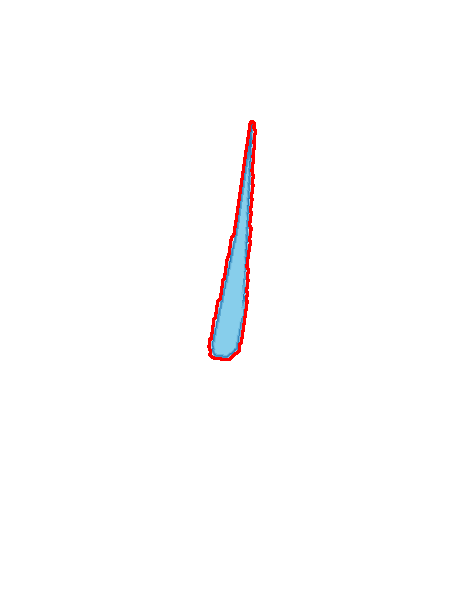

Imagen Caso05_2.png


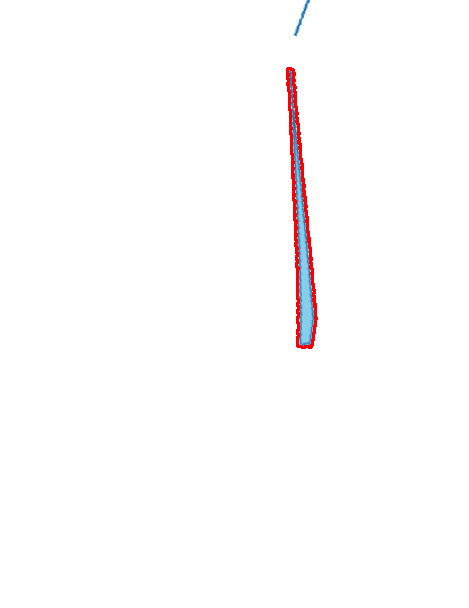

Imagen Caso09_1.png


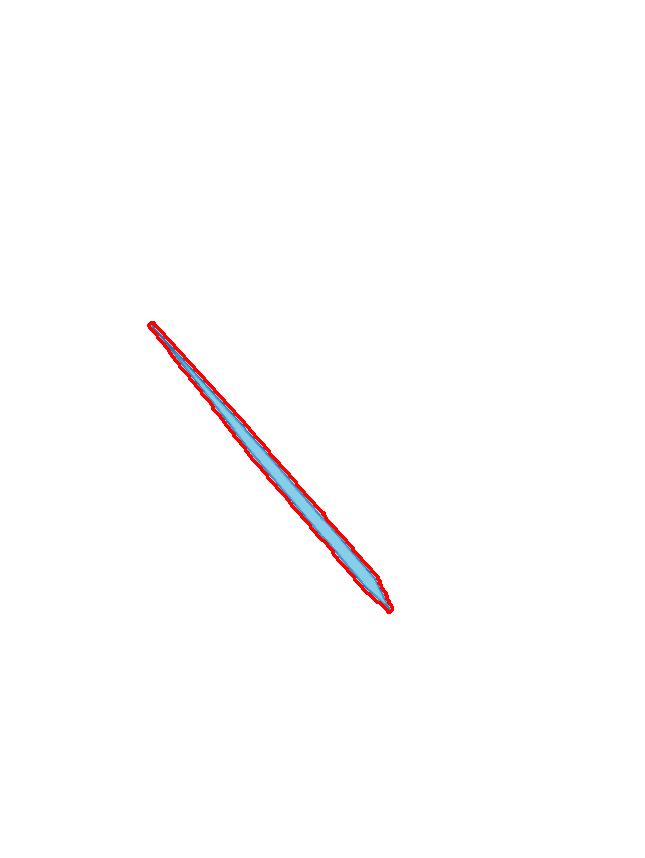

Imagen Caso06_1.png


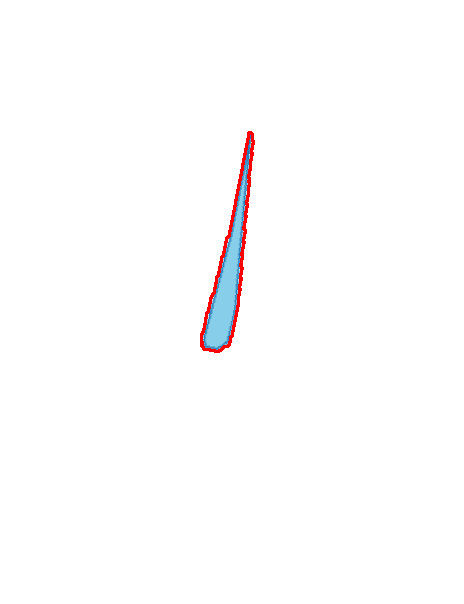

Imagen Caso02_2.png


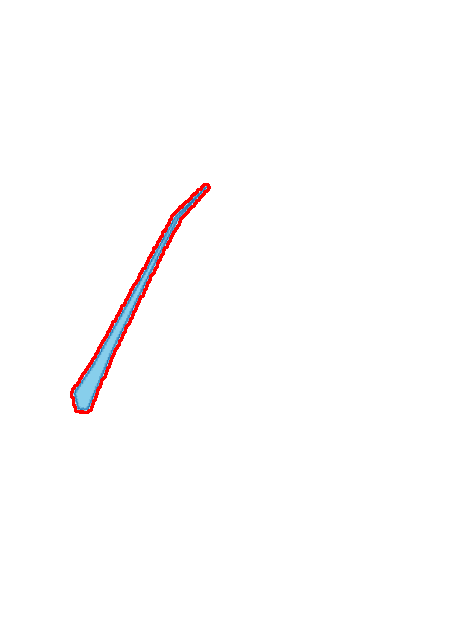

Imagen Caso10_0.png


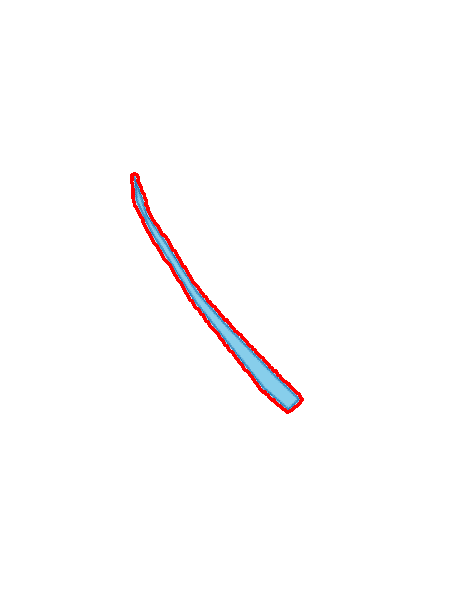

Imagen Caso03_0.png


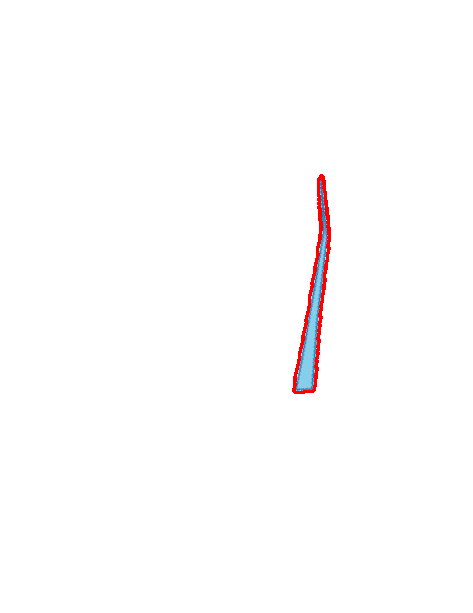

Imagen Caso04_0.png


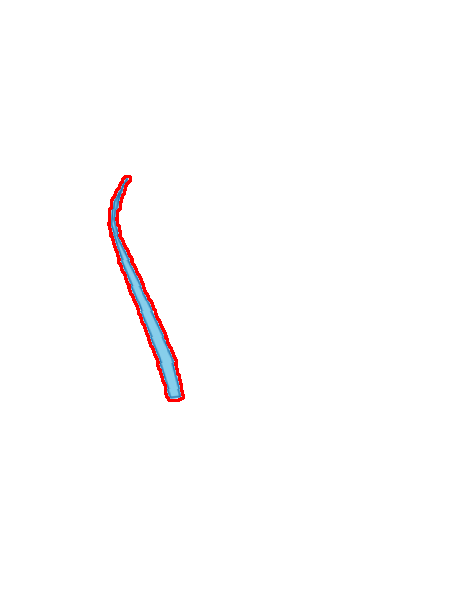

Imagen Caso04_2.png


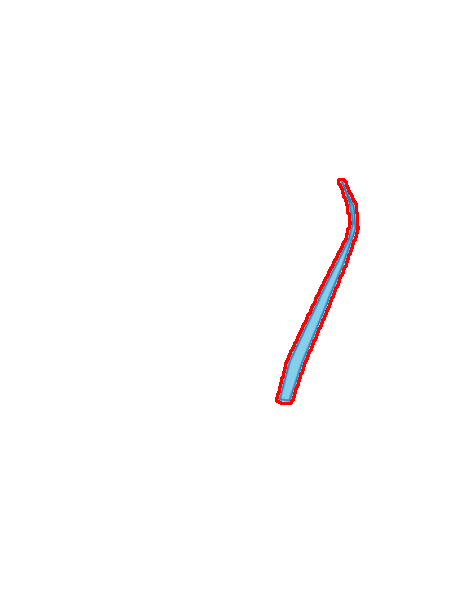

Imagen Caso10_1.png


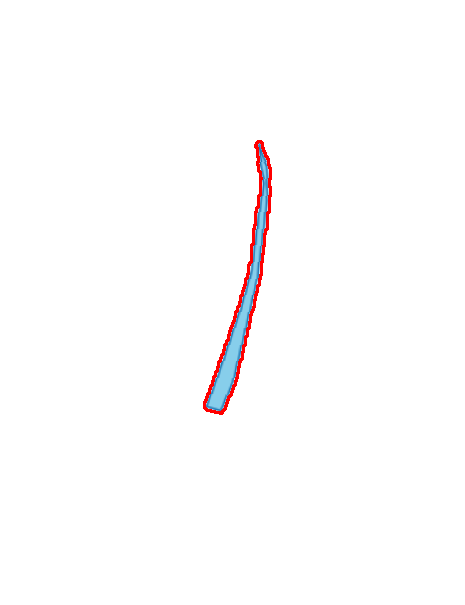

Imagen Caso07_2.png


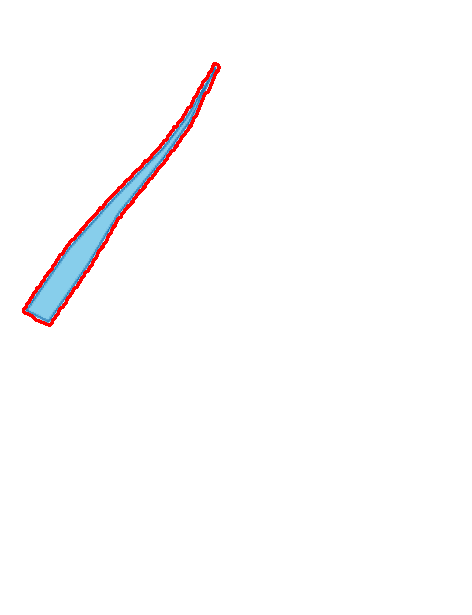

Imagen Caso08_1.png


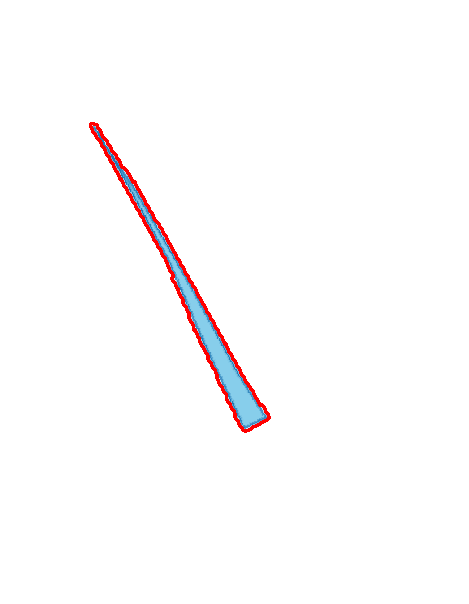

Imagen Caso05_0.png


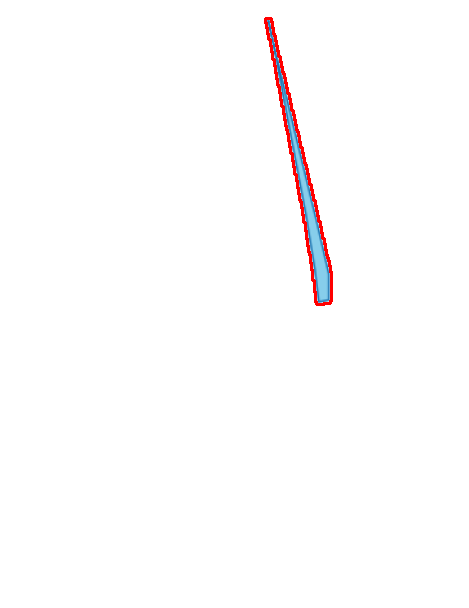

Imagen Caso04_1.png


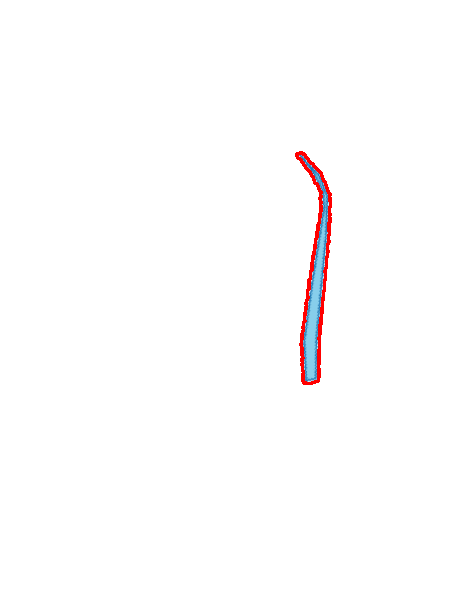

Imagen Caso02_1.png


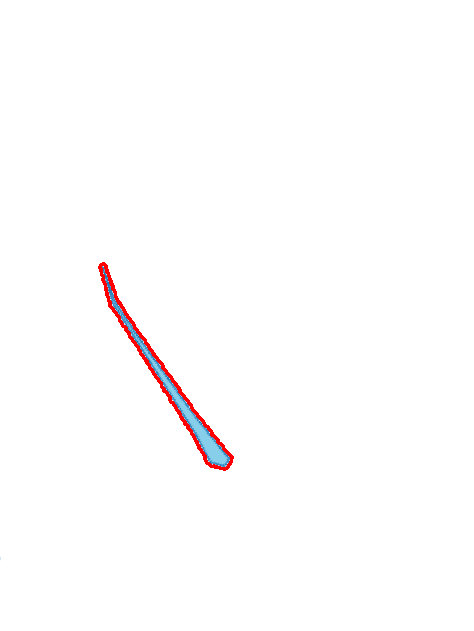

Imagen Caso01_0.png


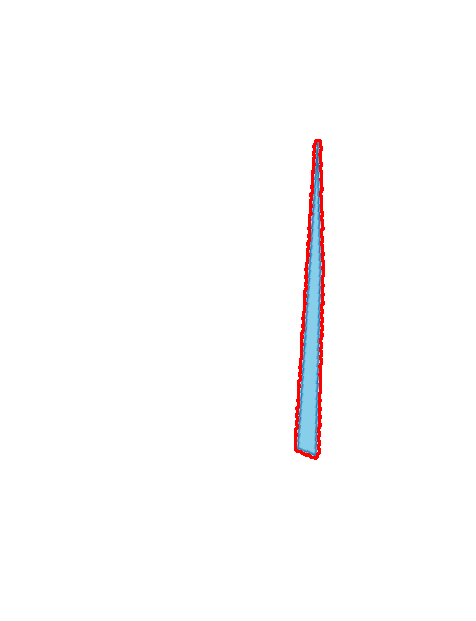

Imagen Caso03_2.png


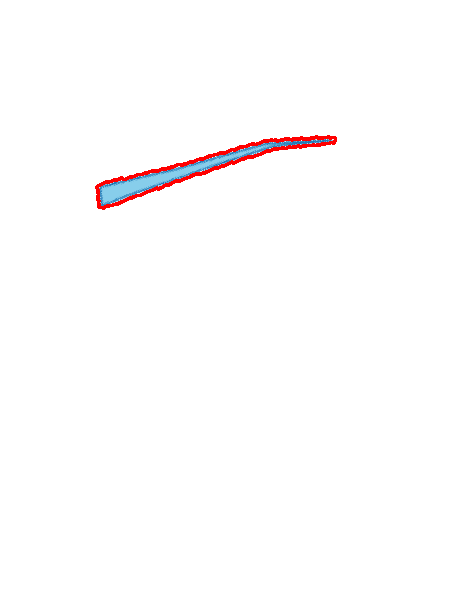

Imagen Caso02_0.png


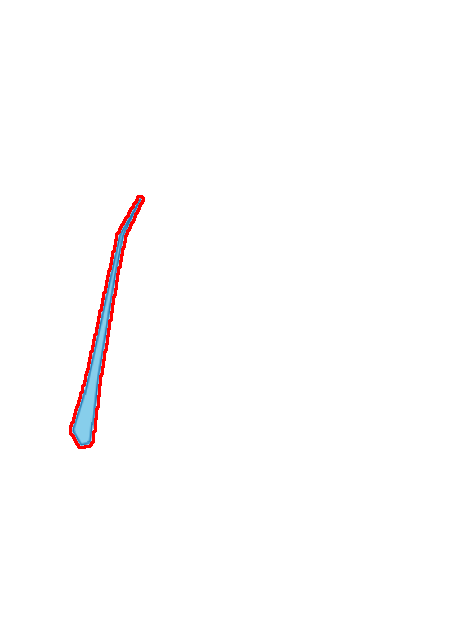

Imagen Caso06_0.png


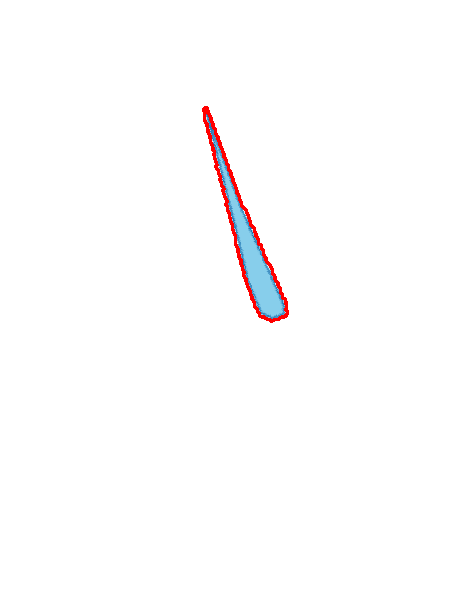

Imagen Caso10_2.png


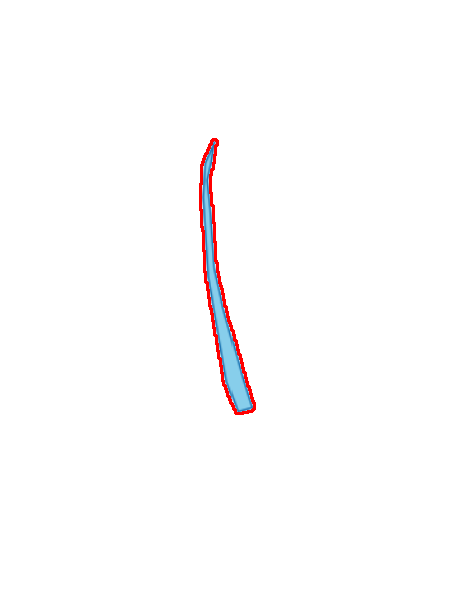

Imagen Caso01_1.png


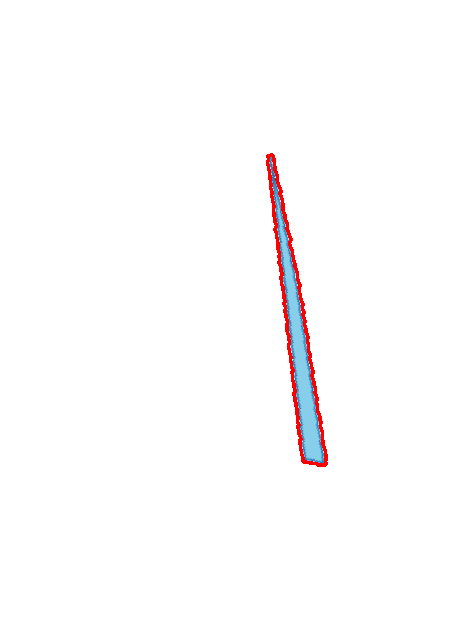

Imagen Caso08_2.png


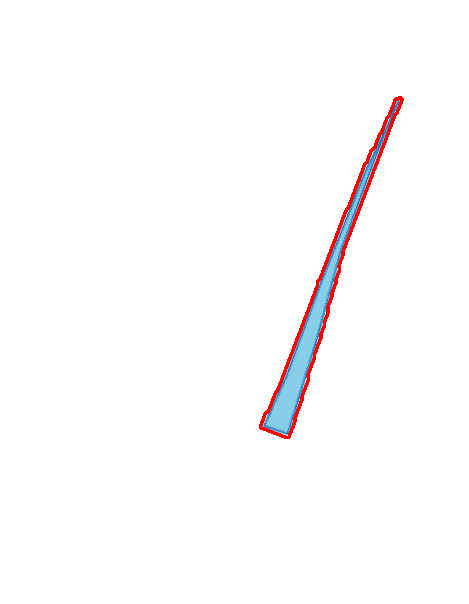

Imagen Caso08_0.png


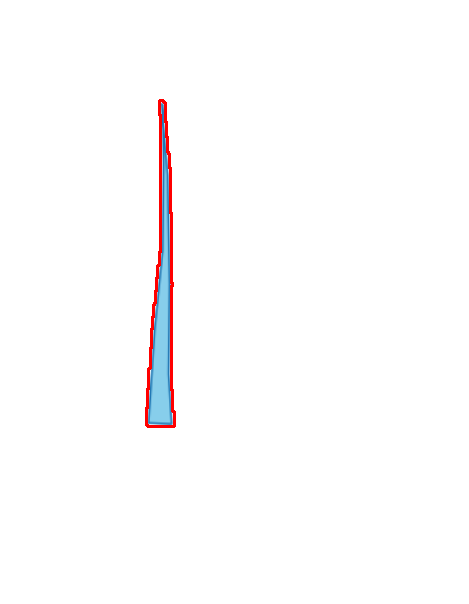

Imagen Caso01_2.png


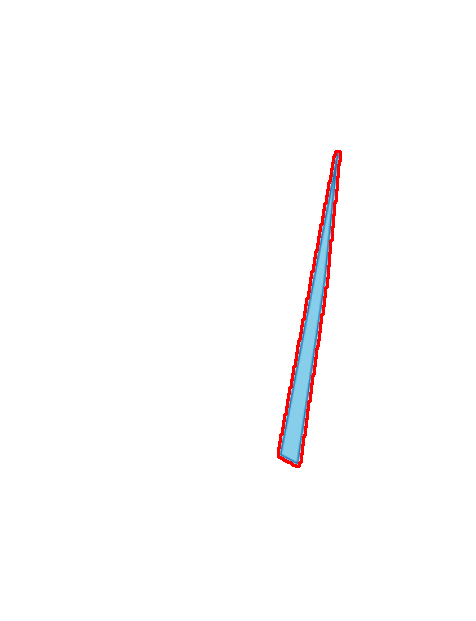

Imagen Caso07_1.png


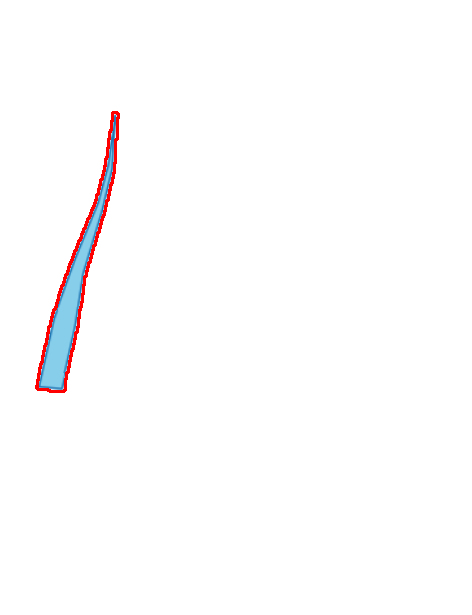

Imagen Caso05_1.png


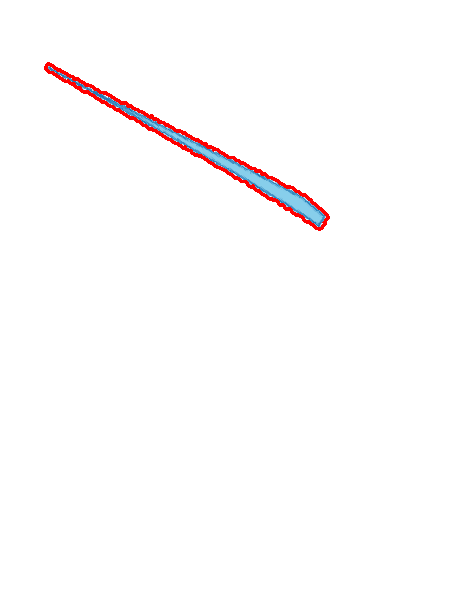

In [ ]:
diccionario_nervios = obtener_bordes(nervios, dibujar=True)


## Generar JSON

In [ ]:
# Método encargado de obtener los puntos del borde de una imagen.
#
# Parámetros:
#  - foto: foto de la que se quieren obtener los puntos.
#  - diccionario: diccionario que contiene el valor de los puntos del borde
#                 de todas las imágenes.
# Return:
#  - x, y: listas de cada eje que contienen los puntos del borde.
def obtiene_puntos(foto, diccionario):
    x = []
    y = []
    for i in range(len(diccionario[foto])):
        x.append(int(diccionario[foto][i][0][0]))
        y.append(int(diccionario[foto][i][0][1]))

    return x, y

In [ ]:
# Método encargado de inicializar el JSON de una imagen, añadiendo los puntos
# del borde en cada eje y su nombre.
#
# Parámetros:
#  - foto: foto de la que se quiere inicializar el JSON.
#  - puntos_x: puntos del borde en el eje X.
#  - puntos_y: puntos del borde en el eje Y.
# Return:
#  - datos: diccionario con todos los datos añadidos para poder convertirlo a
#           JSON.
def inicializa_JSON(foto, puntos_x, puntos_y):
    atributos = {}
    atributos["shape_attributes"] = {}
    atributos["shape_attributes"]["all_points_x"] = puntos_x
    atributos["shape_attributes"]["all_points_y"] = puntos_y

    datos = {}
    datos[foto] = {}
    datos[foto]["filename"] = foto
    datos[foto]["regions"] = []
    datos[foto]["regions"].append(atributos)

    return datos


In [ ]:
# Método encargado de crear los JSON de las imágenes.
#
# Parámetros:
#  - diccionario_dientes: diccionario con las imágenes y los valores del borde
#                         del diente.
#  - diccionario_nervios: diccionario con las imágenes y los valores del borde
#                         del nervio.
def crea_JSON(diccionario_dientes, diccionario_nervios):
    # Creamos el directorio donde se guardan los JSON
    if not os.path.isdir('final/'):
        os.makedirs('final/', exist_ok=True)

    # Obtenemos el nombre de todas las imágenes
    claves_dientes = list(diccionario_dientes.keys())
    claves_nervios = list(diccionario_nervios.keys())

    # Nos quedamos con aquellas imágenes que tienen el borde correcto tanto 
    # para el diente como para el nervio
    fotos_buenas = list(set(claves_dientes) & set(claves_nervios))

    #Creamos el JSON de cada imágen del diente y del nervio
    for f in fotos_buenas:
        puntos_x_diente, puntos_y_diente = obtiene_puntos(f,
                                                          diccionario_dientes)
        archivo = inicializa_JSON(f, puntos_x_diente, puntos_y_diente)
        with open('final/'+f[:-4]+'_1.json', 'w') as fichero:
            json.dump(archivo, fichero)

        puntos_x_nervio, puntos_y_nervio = obtiene_puntos(f,
                                                          diccionario_nervios)
        archivo = inicializa_JSON(f, puntos_x_nervio, puntos_y_nervio)
        with open('final/'+f[:-4]+'_2.json', 'w') as fichero:
            json.dump(archivo, fichero)

        shutil.copy(r'reales/'+f[:-4]+'.png', r'final/')

In [ ]:
crea_JSON(diccionario_dientes, diccionario_nervios)

## Crear ZIP para descargar de Google Colab

In [ ]:
lista_ficheros = []
for fichero in os.listdir("final/"):
    lista_ficheros.append("final/"+fichero)


In [ ]:
with zipfile.ZipFile('final.zip', 'w') as zip:
    for fich in lista_ficheros:
        zip.write(fich)
zip.close()